# Star Wars Project

The team at FiveThirtyEight asked guestions about Star Wars from fans using SurveyMonkey.  They received a total of 835 responses.  

## Importing dataset

In [116]:
import pandas as pd
# Reading the data into a dataframe
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Previewing the data
print(star_wars.head(5))
print(star_wars.columns)

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

In [117]:
# removing rows with NaN repsondent IDs
star_wars = star_wars[star_wars['RespondentID'].notnull()]

# Remapping Values

## Yes and No

In [118]:
# Create a mapping dictionary
yes_no = {
    "Yes": True,
    "No": False
}

# Create text shortcuts
franchise_text = 'Have you seen any of the 6 films in the Star Wars franchise?'
fan_text = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
# Creating a list with the text values
fan_fran = [franchise_text, fan_text]
# Looping through relevant columns to map new values according to yes_no dictionary
for text in fan_fran:
    star_wars[text] = star_wars[text].map(yes_no)


## Multiple Choice Columns

In [119]:
import numpy as np

# create a dictionary with all of the movie titles and assiagn them a boolean operator
movie_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}
# create a list of all of the movie columns
movie_col_names = ['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

# Loop through each column and remap the values
for movie in movie_col_names:
    star_wars[movie] = star_wars[movie].map(movie_dict)

# Renaming

## Movie Columns

In [120]:
# Creating an empty rename dictionary for the movie titles 
rename_dict = {}
# Setting a counter to iterate through the column name list

# Looping through all the names in the movie title and declaring a more 
# intuitive column name
for idx, movie in enumerate(movie_col_names):
    #  setting the current column title to the movie name
    rename_dict[movie] = "seen_" + str(idx+1)

# Renaming movie columns
star_wars = star_wars.rename(index=str, columns = rename_dict)

## Ranking Columns

In [121]:
# Settting ranking values for relevant columns to a float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# Creating an empty dictionary to house new names
rank_dict = {}
# Iterating through the relevant column names
for idx, col in enumerate(star_wars.columns[9:15].tolist()):
    # Assigning the old column name to the new column name
    rank_dict[col] = "ranking_" +str(idx+1)
   
# Renaming ranking columns
star_wars = star_wars.rename(index=str, columns = rank_dict)

## Visualizing Rankings

<function matplotlib.pyplot.show>

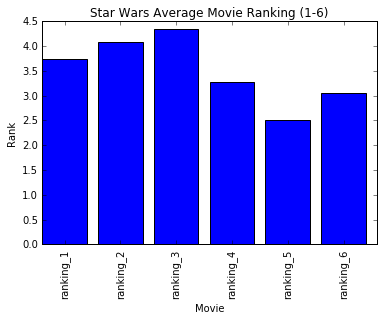

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

# computing the mean rankings 
ranking_means = star_wars.loc[:,'ranking_1':'ranking_6'].mean()

xpos = np.arange(0, len(ranking_means))

plt.bar(xpos, ranking_means)
plt.xticks(xpos+.4, ranking_means.index, rotation=90)
plt.title('Star Wars Average Movie Ranking (1-6)')
plt.ylabel('Rank')
plt.xlabel('Movie')
plt.show

Episode V: Empire stricks back had the best ranking (lowest number is better), while the newer movies Episodes I-III were ranked lower.  This is consistent with feedback I've received from both avid and casual Star Wars fans.  

<function matplotlib.pyplot.show>

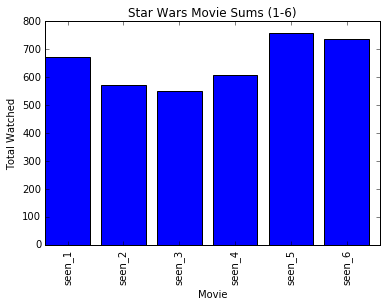

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

# computing the mean rankings 
seen_sum = star_wars.loc[:,'seen_1':'seen_6'].sum()

# creating bar spacing for the plot
xpos = np.arange(0, len(seen_sum))

# Creating and labeling the bar plot
plt.bar(xpos, seen_sum)
plt.xticks(xpos+.4, seen_sum.index, rotation=90)
plt.title('Star Wars Movie Sums (1-6)')
plt.ylabel('Total Watched')
plt.xlabel('Movie')
plt.show

The number of movies watched is consistent with the average movie ranking.  Most people have seen Episode V, with it getting lower for the newer movies.  

# Star Wars by Gender

In [124]:
# Subsetting the data  by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

<function matplotlib.pyplot.show>

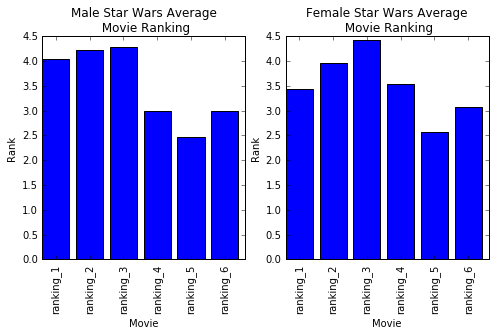

In [125]:
# computing the mean rankings 
males_ranking_means = males.loc[:,'ranking_1':'ranking_6'].mean()
females_ranking_means = females.loc[:,'ranking_1':'ranking_6'].mean()

# Creating the bar spacing for the bar plot
xpos = np.arange(0, len(males_ranking_means))
# Creating the subplot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

# Creating the two bar plots
ax1.bar(xpos, males_ranking_means)
ax2.bar(xpos, females_ranking_means)

# Labeling the plots
ax1.set_title('Male Star Wars Average\n Movie Ranking')
ax1.set_ylabel('Rank')
ax1.set_xlabel('Movie')
ax1.set_xticks(xpos+0.4)
ax1.set_xticklabels(ranking_means.index, rotation=90)

ax2.set_title('Female Star Wars Average\n Movie Ranking')
ax2.set_ylabel('Rank')
ax2.set_xlabel('Movie')
ax2.set_xticks(xpos+0.4)
ax2.set_xticklabels(ranking_means.index, rotation=90)

plt.show

<function matplotlib.pyplot.show>

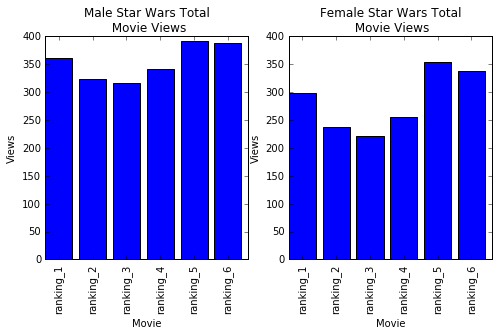

In [126]:
# computing the sum views by movie 
males_view_sum = males.loc[:,'seen_1':'seen_6'].sum()
females_view_sum = females.loc[:,'seen_1':'seen_6'].sum()

# Creating the bar spacing for the bar plot
xpos = np.arange(0, len(males_ranking_means))
# Creating the subplot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

# Creating the two bar plots
ax1.bar(xpos, males_view_sum)
ax2.bar(xpos, females_view_sum)

# Labeling the plots
ax1.set_title('Male Star Wars Total\n Movie Views')
ax1.set_ylabel('Views')
ax1.set_xlabel('Movie')
ax1.set_xticks(xpos+0.4)
ax1.set_xticklabels(ranking_means.index, rotation=90)

ax2.set_title('Female Star Wars Total\n Movie Views')
ax2.set_ylabel('Views')
ax2.set_xlabel('Movie')
ax2.set_xticks(xpos+0.4)
ax2.set_xticklabels(ranking_means.index, rotation=90)

plt.show

The most popular movie for both males and females was Episode V. There was a larger distribution of values for the females in the first 3 Episodes. The last 3 Episodes (4-6) were the clear favorite for males, but Episode IV and Episode I were tied for females.  

The total  movie views were slightly higher for males, especially for Episodes I - IV.  

# Cleaning Up Character Names

In [145]:
# Creating an empty dictionary to house the renaming pairs
char_dict = {}
# A list of all the characters from the survey
characters = ['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda']
# Mapping characters to column name
for idx, person in enumerate(star_wars.columns[15:29].tolist()):
    char_dict[person] = characters[idx]
# Renaming columns
star_wars = star_wars.rename(index=str, columns=char_dict)
# Subsetting the data to those who very favorably view characters
favorable = star_wars[star_wars.loc[:,'Han Solo':'Yoda'] == 'Very favorably']

# Favorite remapping dictionary
fav_dic = {
    'Very favorably': True,
    np.NaN:False
}

# Remapping each of the character rows
for character in characters:
    favorable[character] = favorable[character].map(fav_dic)

# Summing the total "Very favorable" repsonses and sorting them low to high
fav_sum = favorable[characters].sum().sort_values()

## Plotting favorability 

<function matplotlib.pyplot.show>

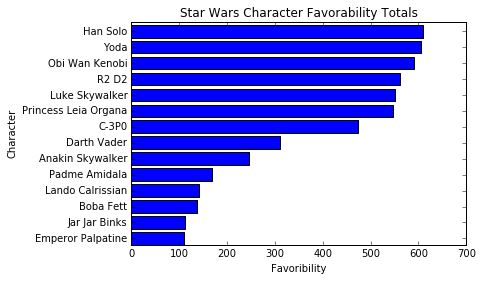

In [148]:
# creating bar spacing for the plot
xpos = np.arange(0, len(fav_sum))

# Creating and labeling the bar plot
plt.barh(xpos, fav_sum)
plt.yticks(xpos+.4, fav_sum.index)
plt.title('Star Wars Character Favorability Totals')
plt.xlabel('Favoribility')
plt.ylabel('Character')
plt.show

Predictable characters like Yoda, Han Solo and Obi Wan have very high favorability ratings. Devisive characters like Jar Jar Binks have even lowere favorability then the vilian in the stories, Darth Vader.  

# Future Work

Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?

Also, look at those who consider themselves Star Wars fans vs. Star Trek fans. 